In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import probplot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import f_oneway
from datetime import timedelta
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, normaltest
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
rail_inbound_28 = [ 4608, 4175, 4609, 4561, 4710, 4612, 4845, 4788, 4754, 4975, 4764, 5070]
total_rail_inbound_28_2030 = 56471
avg_total_rail_inbound_28_2030 = 56458
std_rail_inbound_28_2030 = 697

road_inbound_28 = [166, 150, 160, 160, 148, 154, 158, 141, 149, 147, 139, 151]
total_road_inbound_28_2030 = 1823
avg_total_road_inbound_28_2030 = 1823
std_road_inbound_28_2030 = 52

rail_inbound_sustainable_28 = [4641, 4205, 4641, 4593, 4740, 4643, 4877, 4816, 4784, 5004, 4792, 5100]
total_rail_inbound_sustainable_28_2030 = 56836
avg_total_rail_inbound_sustainable_28_2030 = 56823
std_rail_inbound_sustainable_28_2030 = 697

road_inbound_sustainable_28 = [133, 120, 128, 128, 118, 123, 126, 113, 119, 118, 111, 121]
total_road_inbound_sustainable_28_2030 = 1458
avg_total_road_inbound_sustainable_28_2030 = 1458
std_road_inbound_sustainable_28_2030 = 42

rail_inbound_tendencial = [3857, 3474, 3820, 3798, 3895, 3800, 4009, 3940, 3899, 4061, 3881, 4125]
total_rail_inbound_tendencial_2030 = 46559
avg_total_rail_inbound_tendencial_2030 = 46568
std_rail_inbound_tendencial_2030 = 719

road_inbound_tendencial = [145, 131, 141, 143, 126, 126, 134, 119, 126, 123, 115, 128]
total_road_inbound_tendencial_2030 = 1557
avg_total_road_inbound_tendencial_2030 = 1552
std_road_inbound_tendencial_2030 = 49

rail_inbound_sustainable_tendencial = [3886, 3500, 3848, 3827, 3920, 3825, 4036, 3964, 3924, 4086, 3904, 4151]
total_rail_inbound_sustainable_tendencial_2030 = 46871
avg_total_rail_inbound_sustainable_tendencial_2030 = 46878
std_rail_inbound_sustainable_tendencial_2030 = 719

road_inbound_sustainable_tendencial = [116, 105, 113, 114, 101, 101, 107, 95, 101, 98, 92, 102]
total_road_inbound_sustainable_tendencial_2030 = 1245
avg_total_road_inbound_sustainable_tendencial_2030 = 1242
std_road_inbound_sustainable_tendencial_2030 = 39


rail_outbound_28 = [3174, 2870, 3134, 3148, 3203, 3125, 3316, 3223, 3238, 3360, 3157, 3421]
total_rail_outbound_28_2030 = 38369
avg_total_rail_outbound_28_2030 = 38361
std_rail_outbound_28_2030 = 623

road_outbound_28 = [118, 105, 116, 115, 108, 113, 115, 100, 99, 91, 88, 98]
total_road_outbound_28_2030 = 1266
avg_total_road_outbound_28_2030 = 1275
std_road_outbound_28_2030 = 49

rail_outbound_sustainable_28 = [3198, 2891, 3157, 3171, 3225, 3148, 3339, 3243, 3258, 3378, 3175, 3441]
total_rail_outbound_sustainable_28_2030 = 38624
avg_total_rail_outbound_sustainable_28_2030 = 38616
std_rail_outbound_sustainable_28_2030 = 623

road_outbound_sustainable_28 = [94, 84, 93, 92, 86, 90, 92, 80, 79, 73, 70, 78]
total_road_outbound_sustainable_28_2030 = 1011
avg_total_road_outbound_sustainable_28_2030 = 1020
std_road_outbound_sustainable_28_2030 = 39

rail_outbound_tendencial = [2662, 2395, 2613, 2603, 2655, 2581, 2732, 2649, 2658, 2765, 2569, 2794]
total_rail_outbound_tendencial_2030 = 31676
avg_total_rail_outbound_tendencial_2030 = 31668
std_rail_outbound_tendencial_2030 = 640

road_outbound_tendencial = [104, 86, 94, 93, 87, 91, 94, 80, 79, 74, 69, 74]
total_road_outbound_tendencial_2030 = 1025
avg_total_road_outbound_tendencial_2030 = 1031
std_road_outbound_tendencial_2030 = 44

rail_outbound_sustainable_tendencial = [2677, 2396, 2624, 2629, 2639, 2626, 2761, 2648, 2702, 2779, 2604, 2832]
total_rail_outbound_sustainable_tendencial_2030 = 31882
avg_total_rail_outbound_sustainable_tendencial_2030 = 31874
std_rail_outbound_sustainable_tendencial_2030 = 640

road_outbound_sustainable_tendencial = [81, 71, 78, 75, 70, 74, 74, 62, 65, 60, 54, 60]
total_road_outbound_sustainable_tendencial_2030 = 819
avg_total_road_outbound_sustainable_tendencial_2030 = 825
std_road_outbound_sustainable_tendencial_2030 = 35

emission_factor_road_diesel = 0.6  # toneladas de CO₂ por TEU by Diesel(rodoviário)
emission_factor_road_bev = 0.18  # toneladas de CO₂ por TEU by BEV (rodoviário)
emission_factor_lng = 0.66 # toneladas de CO₂ por TEU by LNG (rodoviário)
emission_factor_fcev = 0.69 # toneladas de CO₂ por TEU by FCEV (rodoviário)
emission_factor_rail = 0.21  # toneladas de CO₂ por TEU (ferroviário)

total_teus_inbound_28_2030 = total_rail_inbound_28_2030 + total_road_inbound_28_2030
total_teus_inbound_sustainable_28_2030 = total_rail_inbound_sustainable_28_2030 + total_road_inbound_sustainable_28_2030
total_teus_inbound_tendencial_2030 = total_rail_inbound_tendencial_2030 + total_road_inbound_tendencial_2030
total_teus_inbound_sustainable_tendencial_2030 = total_rail_inbound_sustainable_tendencial_2030 + total_road_inbound_sustainable_tendencial_2030

total_teus_outbound_28_2030 = total_rail_outbound_28_2030 + total_road_outbound_28_2030
total_teus_outbound_sustainable_28_2030 = total_rail_outbound_sustainable_28_2030 + total_road_outbound_sustainable_28_2030
total_teus_outbound_tendencial_2030 = total_rail_outbound_tendencial_2030 + total_road_outbound_tendencial_2030
total_teus_outbound_sustainable_tendencial_2030 = total_rail_outbound_sustainable_tendencial_2030 + total_road_outbound_sustainable_tendencial_2030

total_teus_2030 = total_teus_inbound_28_2030 + total_teus_outbound_28_2030
total_teus_sustainable_2030 = total_teus_inbound_sustainable_28_2030 + total_teus_outbound_sustainable_28_2030
total_teus_tendencial_2030 = total_teus_inbound_tendencial_2030 + total_teus_outbound_tendencial_2030
total_teus_sustainable_tendencial_2030 = total_teus_inbound_sustainable_tendencial_2030 + total_teus_outbound_sustainable_tendencial_2030

total_teus_inbound_mean_28 = avg_total_rail_inbound_28_2030 + avg_total_road_inbound_28_2030
total_teus_inbound_std_28 = np.sqrt(std_rail_inbound_28_2030**2 + std_road_inbound_28_2030**2)
total_teus_inbound_sustainable_mean_28 = avg_total_rail_inbound_sustainable_28_2030 + avg_total_road_inbound_sustainable_28_2030
total_teus_inbound_sustainable_std_28 = np.sqrt(std_rail_inbound_sustainable_28_2030**2 + std_road_inbound_sustainable_28_2030**2)
total_teus_inbound_tendencial_mean = avg_total_rail_inbound_tendencial_2030 + avg_total_road_inbound_tendencial_2030
total_teus_inbound_tendencial_std = np.sqrt(std_rail_inbound_tendencial_2030**2 + std_road_inbound_tendencial_2030**2)
total_teus_inbound_sustainable_tendencial_mean = avg_total_rail_inbound_sustainable_tendencial_2030 + avg_total_road_inbound_sustainable_tendencial_2030
total_teus_inbound_sustainable_tendencial_std = np.sqrt(std_rail_inbound_sustainable_tendencial_2030**2 + std_road_inbound_sustainable_tendencial_2030**2)

total_teus_outbound_mean_28 = avg_total_rail_outbound_28_2030 + avg_total_road_outbound_28_2030
total_teus_outbound_std_28 = np.sqrt(std_rail_outbound_28_2030**2 + std_road_outbound_28_2030**2)
total_teus_outbound_sustainable_mean_28 = avg_total_rail_outbound_sustainable_28_2030 + avg_total_road_outbound_sustainable_28_2030
total_teus_outbound_sustainable_std_28 = np.sqrt(std_rail_outbound_sustainable_28_2030**2 + std_road_outbound_sustainable_28_2030**2)
total_teus_outbound_tendencial_mean = avg_total_rail_outbound_tendencial_2030 + avg_total_road_outbound_tendencial_2030
total_teus_outbound_tendencial_std = np.sqrt(std_rail_outbound_tendencial_2030**2 + std_road_outbound_tendencial_2030**2)
total_teus_outbound_sustainable_tendencial_mean = avg_total_rail_outbound_sustainable_tendencial_2030 + avg_total_road_outbound_sustainable_tendencial_2030
total_teus_outbound_sustainable_tendencial_std = np.sqrt(std_rail_outbound_sustainable_tendencial_2030**2 + std_road_outbound_sustainable_tendencial_2030**2)

total_teus_mean_28_2030 = total_teus_inbound_mean_28 + total_teus_outbound_mean_28
total_teus_std_28_2030 = np.sqrt(total_teus_inbound_std_28**2 + total_teus_outbound_std_28**2)
total_teus_sustainable_mean_2030 = total_teus_inbound_sustainable_mean_28 + total_teus_outbound_sustainable_mean_28
total_teus_sustainable_std_2030 = np.sqrt(total_teus_inbound_sustainable_std_28**2 + total_teus_outbound_sustainable_std_28**2)
total_teus_tendencial_mean_2030 = total_teus_inbound_tendencial_mean + total_teus_outbound_tendencial_mean
total_teus_tendencial_std_2030 = np.sqrt(total_teus_inbound_tendencial_std**2 + total_teus_outbound_tendencial_std**2)
total_teus_sustainable_tendencial_mean_2030 = total_teus_inbound_sustainable_tendencial_mean + total_teus_outbound_sustainable_tendencial_mean
total_teus_sustainable_tendencial_std_2030 = np.sqrt(total_teus_inbound_sustainable_tendencial_std**2 + total_teus_outbound_sustainable_tendencial_std**2)

0      20562.5700
1      20944.4463
2      21326.3226
3      21708.1989
4      22090.0752
          ...    
96     57222.6948
97     57604.5711
98     57986.4474
99     58368.3237
100    58750.2000
Name: Total Emissions Mean, Length: 101, dtype: float64


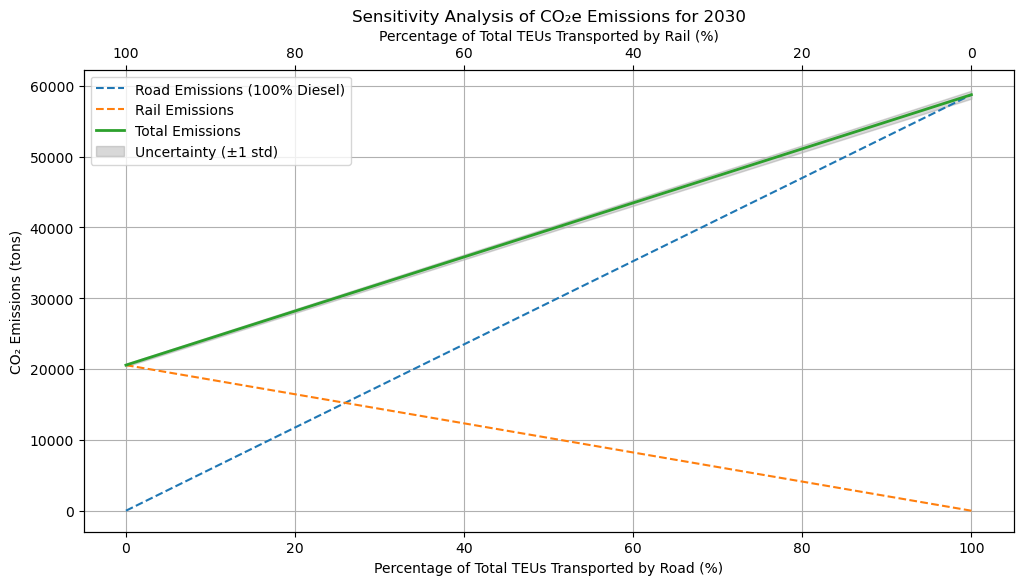

In [21]:
percentages = np.arange(0, 101, 1)

# Lista para armazenar resultados
sensitivity_results = []

for road_percentage in percentages:
    rail_percentage = 100 - road_percentage
    
    # TEUs médios para rodovia e ferrovia
    teus_road_mean = (road_percentage / 100) * total_teus_mean_28_2030
    teus_rail_mean = (rail_percentage / 100) * total_teus_mean_28_2030
    
    # Desvio padrão para cada modo (aproximação)
    teus_road_std = (road_percentage / 100) * total_teus_std_28_2030
    teus_rail_std = (rail_percentage / 100) * total_teus_std_28_2030
    
    emissions_road_mean = teus_road_mean * emission_factor_road_diesel
    emissions_rail_mean = teus_rail_mean * emission_factor_rail
    total_emissions_mean = emissions_road_mean + emissions_rail_mean
    
    # ----------------------------------------------------
    # Emissões mín e máx (±1 std)
    # (Se teus_road_mean < teus_road_std, poderia dar negativo; use max(...,0) se necessário)
    # ----------------------------------------------------
    road_min = max(teus_road_mean - teus_road_std, 0)
    road_max = teus_road_mean + teus_road_std
    
    rail_min = max(teus_rail_mean - teus_rail_std, 0)
    rail_max = teus_rail_mean + teus_rail_std
    
    emissions_road_min = road_min * emission_factor_road_diesel
    emissions_road_max = road_max * emission_factor_road_diesel
    emissions_rail_min = rail_min * emission_factor_rail
    emissions_rail_max = rail_max * emission_factor_rail
    
    total_emissions_min = emissions_road_min + emissions_rail_min
    total_emissions_max = emissions_road_max + emissions_rail_max
    
    # Armazenar no dicionário
    sensitivity_results.append({
        "% Road": road_percentage,
        "% Rail": rail_percentage,
        "Road Emissions Mean": emissions_road_mean,
        "Rail Emissions Mean": emissions_rail_mean,
        "Total Emissions Mean": total_emissions_mean,
        "Total Emissions Min": total_emissions_min,
        "Total Emissions Max": total_emissions_max
    })

# Converter em DataFrame
df_sensitivity = pd.DataFrame(sensitivity_results)

# Print valores total emissões
print(df_sensitivity["Total Emissions Mean"])

plt.figure(figsize=(12, 6))

# Linha de emissões rodoviárias (média)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Road Emissions Mean"],
         label="Road Emissions (100% Diesel)", linestyle="--")

# Linha de emissões ferroviárias (média)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Rail Emissions Mean"],
         label="Rail Emissions", linestyle="--")

# Linha de emissões totais (média)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Total Emissions Mean"],
         label="Total Emissions", linewidth=2)

# Faixa de incerteza (±1 std) para emissões totais
plt.fill_between(
    df_sensitivity["% Road"],
    df_sensitivity["Total Emissions Min"],
    df_sensitivity["Total Emissions Max"],
    color="gray", alpha=0.3, label="Uncertainty (±1 std)"
)

plt.xlabel("Percentage of Total TEUs Transported by Road (%)")
plt.ylabel("CO₂ Emissions (tons)")
plt.title("Sensitivity Analysis of CO₂e Emissions for 2030")
plt.legend()
plt.grid(True)

# Eixo superior (porcentagem Rail)
ax1 = plt.gca()
ax2 = ax1.twiny()

ax2.set_xlim(ax1.get_xlim())  # Alinha os limites do eixo superior ao eixo inferior
ax2.set_xticks(df_sensitivity["% Road"][::20])  # Seleciona menos pontos para evitar sobreposição
ax2.set_xticklabels(100 - df_sensitivity["% Road"][::20])  # Usa os valores complementares para o eixo superior

ax2.set_xlabel("Percentage of Total TEUs Transported by Rail (%)")

plt.show()

0      20562.570000
1      20933.871264
2      21305.172528
3      21676.473792
4      22047.775056
           ...     
96     56207.491344
97     56578.792608
98     56950.093872
99     57321.395136
100    57692.696400
Name: Total Emissions Mean, Length: 101, dtype: float64


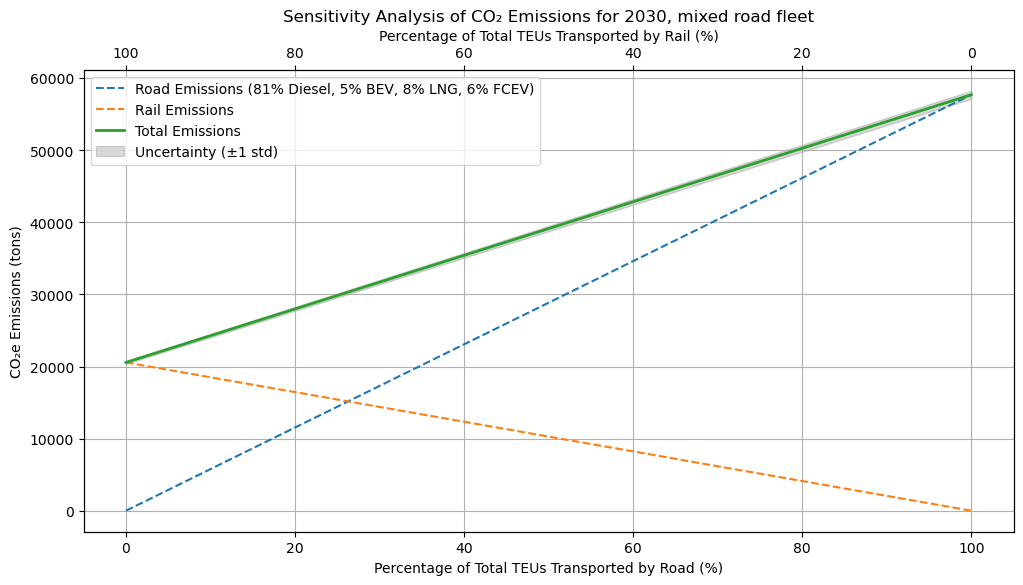

In [20]:
percentages = np.arange(0, 101, 1)

# Lista para armazenar resultados
sensitivity_results = []

for road_percentage in percentages:
    rail_percentage = 100 - road_percentage
    
    # TEUs médios para rodovia e ferrovia
    teus_road_mean = (road_percentage / 100) * total_teus_mean_28_2030
    teus_rail_mean = (rail_percentage / 100) * total_teus_mean_28_2030
    
    # Desvio padrão para cada modo (aproximação)
    teus_road_std = (road_percentage / 100) * total_teus_std_28_2030
    teus_rail_std = (rail_percentage / 100) * total_teus_std_28_2030
    
    emissions_road_mean = (
        0.81 * teus_road_mean * emission_factor_road_diesel +
        0.05 * teus_road_mean * emission_factor_road_bev +
        0.08 * teus_road_mean * emission_factor_lng +
        0.06 * teus_road_mean * emission_factor_fcev
    )
    emissions_rail_mean = teus_rail_mean * emission_factor_rail
    total_emissions_mean = emissions_road_mean + emissions_rail_mean
    
    # ----------------------------------------------------
    # Emissões mín e máx (±1 std)
    # (Se teus_road_mean < teus_road_std, poderia dar negativo; use max(...,0) se necessário)
    # ----------------------------------------------------
    road_min = max(teus_road_mean - teus_road_std, 0)
    road_max = teus_road_mean + teus_road_std
    
    rail_min = max(teus_rail_mean - teus_rail_std, 0)
    rail_max = teus_rail_mean + teus_rail_std
    
    emissions_road_min = (
        0.81 * road_min * emission_factor_road_diesel +
        0.05 * road_min * emission_factor_road_bev +
        0.08 * road_min * emission_factor_lng +
        0.06 * road_min * emission_factor_fcev
    )
    emissions_road_max = (
        0.81 * road_max * emission_factor_road_diesel +
        0.05 * road_max * emission_factor_road_bev +
        0.08 * road_max * emission_factor_lng +
        0.06 * road_max * emission_factor_fcev
    )
    emissions_rail_min = rail_min * emission_factor_rail
    emissions_rail_max = rail_max * emission_factor_rail
    
    total_emissions_min = emissions_road_min + emissions_rail_min
    total_emissions_max = emissions_road_max + emissions_rail_max
    
    # Armazenar no dicionário
    sensitivity_results.append({
        "% Road": road_percentage,
        "% Rail": rail_percentage,
        "Road Emissions Mean": emissions_road_mean,
        "Rail Emissions Mean": emissions_rail_mean,
        "Total Emissions Mean": total_emissions_mean,
        "Total Emissions Min": total_emissions_min,
        "Total Emissions Max": total_emissions_max
    })

# Converter em DataFrame
df_sensitivity = pd.DataFrame(sensitivity_results)

# Print valores total emissões
print(df_sensitivity["Total Emissions Mean"])

plt.figure(figsize=(12, 6))

# Linha de emissões rodoviárias (média)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Road Emissions Mean"],
         label="Road Emissions (81% Diesel, 5% BEV, 8% LNG, 6% FCEV)", linestyle="--")

# Linha de emissões ferroviárias (média)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Rail Emissions Mean"],
         label="Rail Emissions", linestyle="--")

# Linha de emissões totais (média)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Total Emissions Mean"],
         label="Total Emissions", linewidth=2)

# Faixa de incerteza (±1 std) para emissões totais
plt.fill_between(
    df_sensitivity["% Road"],
    df_sensitivity["Total Emissions Min"],
    df_sensitivity["Total Emissions Max"],
    color="gray", alpha=0.3, label="Uncertainty (±1 std)"
)

plt.xlabel("Percentage of Total TEUs Transported by Road (%)")
plt.ylabel("CO₂e Emissions (tons)")
plt.title("Sensitivity Analysis of CO₂ Emissions for 2030, mixed road fleet")
plt.legend()
plt.grid(True)

# Eixo superior (porcentagem Rail)
ax1 = plt.gca()
ax2 = ax1.twiny()

ax2.set_xlim(ax1.get_xlim())  # Alinha os limites do eixo superior ao eixo inferior
ax2.set_xticks(df_sensitivity["% Road"][::20])  # Seleciona menos pontos para evitar sobreposição
ax2.set_xticklabels(100 - df_sensitivity["% Road"][::20])  # Usa os valores complementares para o eixo superior
ax2.set_xlabel("Percentage of Total TEUs Transported by Rail (%)")

plt.show()

0      20562.570000
1      20866.308534
2      21170.047068
3      21473.785602
4      21777.524136
           ...     
96     49721.469264
97     50025.207798
98     50328.946332
99     50632.684866
100    50936.423400
Name: Total Emissions Mean, Length: 101, dtype: float64


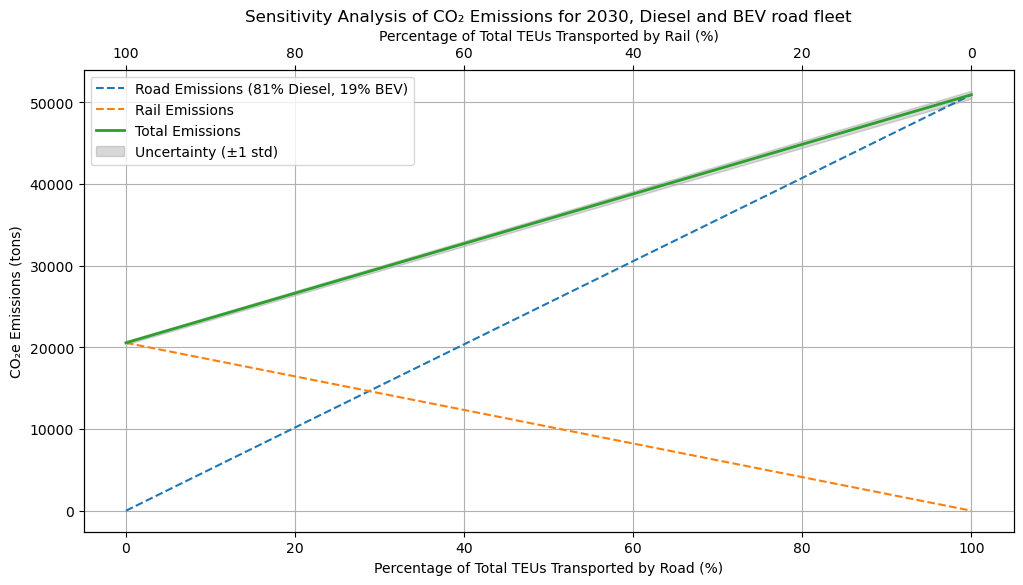

In [22]:
percentages = np.arange(0, 101, 1)

# Lista para armazenar resultados
sensitivity_results = []

for road_percentage in percentages:
    rail_percentage = 100 - road_percentage
    
    # TEUs médios para rodovia e ferrovia
    teus_road_mean = (road_percentage / 100) * total_teus_mean_28_2030
    teus_rail_mean = (rail_percentage / 100) * total_teus_mean_28_2030
    
    # Desvio padrão para cada modo (aproximação)
    teus_road_std = (road_percentage / 100) * total_teus_std_28_2030
    teus_rail_std = (rail_percentage / 100) * total_teus_std_28_2030
    
    emissions_road_mean = (
        0.81 * teus_road_mean * emission_factor_road_diesel +
        0.19 * teus_road_mean * emission_factor_road_bev
    )
    emissions_rail_mean = teus_rail_mean * emission_factor_rail
    total_emissions_mean = emissions_road_mean + emissions_rail_mean
    
    # ----------------------------------------------------
    # Emissões mín e máx (±1 std)
    # (Se teus_road_mean < teus_road_std, poderia dar negativo; use max(...,0) se necessário)
    # ----------------------------------------------------
    road_min = max(teus_road_mean - teus_road_std, 0)
    road_max = teus_road_mean + teus_road_std
    
    rail_min = max(teus_rail_mean - teus_rail_std, 0)
    rail_max = teus_rail_mean + teus_rail_std
    
    emissions_road_min = (
        0.81 * road_min * emission_factor_road_diesel +
        0.19 * road_min * emission_factor_road_bev
    )
    emissions_road_max = (
        0.81 * road_max * emission_factor_road_diesel +
        0.19 * road_max * emission_factor_road_bev
    )
    emissions_rail_min = rail_min * emission_factor_rail
    emissions_rail_max = rail_max * emission_factor_rail
    
    total_emissions_min = emissions_road_min + emissions_rail_min
    total_emissions_max = emissions_road_max + emissions_rail_max
    
    # Armazenar no dicionário
    sensitivity_results.append({
        "% Road": road_percentage,
        "% Rail": rail_percentage,
        "Road Emissions Mean": emissions_road_mean,
        "Rail Emissions Mean": emissions_rail_mean,
        "Total Emissions Mean": total_emissions_mean,
        "Total Emissions Min": total_emissions_min,
        "Total Emissions Max": total_emissions_max
    })

# Converter em DataFrame
df_sensitivity = pd.DataFrame(sensitivity_results)

# Print valores total emissões
print(df_sensitivity["Total Emissions Mean"])

plt.figure(figsize=(12, 6))

# Linha de emissões rodoviárias (média)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Road Emissions Mean"],
         label="Road Emissions (81% Diesel, 19% BEV)", linestyle="--")

# Linha de emissões ferroviárias (média)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Rail Emissions Mean"],
         label="Rail Emissions", linestyle="--")

# Linha de emissões totais (média)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Total Emissions Mean"],
         label="Total Emissions", linewidth=2)

# Faixa de incerteza (±1 std) para emissões totais
plt.fill_between(
    df_sensitivity["% Road"],
    df_sensitivity["Total Emissions Min"],
    df_sensitivity["Total Emissions Max"],
    color="gray", alpha=0.3, label="Uncertainty (±1 std)"
)

plt.xlabel("Percentage of Total TEUs Transported by Road (%)")
plt.ylabel("CO₂e Emissions (tons)")
plt.title("Sensitivity Analysis of CO₂ Emissions for 2030, Diesel and BEV road fleet")
plt.legend()
plt.grid(True)

# Eixo superior (porcentagem Rail)
ax1 = plt.gca()
ax2 = ax1.twiny()

ax2.set_xlim(ax1.get_xlim())  # Alinha os limites do eixo superior ao eixo inferior
ax2.set_xticks(df_sensitivity["% Road"][::20])  # Seleciona menos pontos para evitar sobreposição
ax2.set_xticklabels(100 - df_sensitivity["% Road"][::20])  # Usa os valores complementares para o eixo superior
ax2.set_xlabel("Percentage of Total TEUs Transported by Rail (%)")

plt.show()

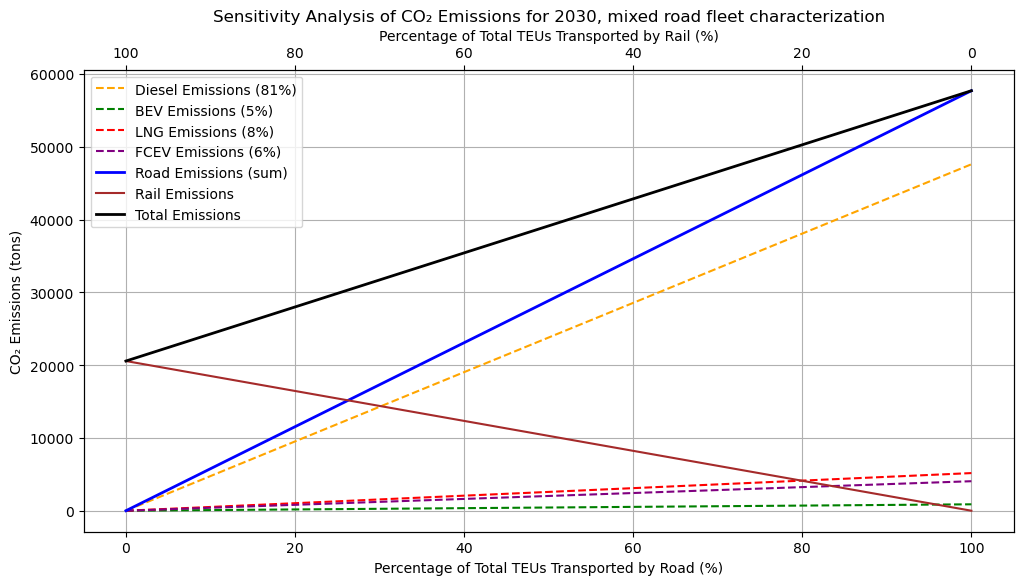

In [23]:
# Lista de porcentagens de transporte rodoviário
percentages = np.arange(0, 101, 1)

sensitivity_results = []

for road_percentage in percentages:
    rail_percentage = 100 - road_percentage
    
    # TEUs médios para rodovia e ferrovia
    teus_road_mean = (road_percentage / 100) * total_teus_mean_28_2030
    teus_rail_mean = (rail_percentage / 100) * total_teus_mean_28_2030
    
    # Emissões ferroviárias
    emissions_rail = teus_rail_mean * emission_factor_rail
    
    frac_diesel = 0.81
    frac_bev    = 0.05
    frac_lng    = 0.08
    frac_fcev   = 0.06
    
    emissions_road_diesel = frac_diesel * teus_road_mean * emission_factor_road_diesel
    emissions_road_bev    = frac_bev    * teus_road_mean * emission_factor_road_bev
    emissions_road_lng    = frac_lng    * teus_road_mean * emission_factor_lng
    emissions_road_fcev   = frac_fcev   * teus_road_mean * emission_factor_fcev
    
    emissions_road_total = (emissions_road_diesel +
                            emissions_road_bev +
                            emissions_road_lng +
                            emissions_road_fcev)
    
    emissions_total = emissions_road_total + emissions_rail
    
    sensitivity_results.append({
        "% Road": road_percentage,
        "% Rail": rail_percentage,
        "Diesel Emissions": emissions_road_diesel,
        "BEV Emissions": emissions_road_bev,
        "LNG Emissions": emissions_road_lng,
        "FCEV Emissions": emissions_road_fcev,
        "Road Emissions": emissions_road_total,
        "Rail Emissions": emissions_rail,
        "Total Emissions": emissions_total
    })

df_sensitivity = pd.DataFrame(sensitivity_results)

# ---------------------------------------------
# Plot do resultado
# ---------------------------------------------
plt.figure(figsize=(12, 6))

# 1) Emissões parciais: Diesel, BEV, LNG, FCEV (linhas sólidas)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Diesel Emissions"],
         label="Diesel Emissions (81%)", linestyle="--", color="orange")
plt.plot(df_sensitivity["% Road"], df_sensitivity["BEV Emissions"],
         label="BEV Emissions (5%)", linestyle="--", color="green")
plt.plot(df_sensitivity["% Road"], df_sensitivity["LNG Emissions"],
         label="LNG Emissions (8%)", linestyle="--", color="red")
plt.plot(df_sensitivity["% Road"], df_sensitivity["FCEV Emissions"],
         label="FCEV Emissions (6%)", linestyle="--", color="purple")

# 2) Emissões rodoviárias totais (traço)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Road Emissions"],
         label="Road Emissions (sum)", color="blue", linewidth=2)

# 3) Emissões ferroviárias (traço)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Rail Emissions"],
         label="Rail Emissions", color="brown")

# 4) Emissões totais (linha espessa)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Total Emissions"],
         label="Total Emissions", color="black", linewidth=2)

plt.xlabel("Percentage of Total TEUs Transported by Road (%)")
plt.ylabel("CO₂ Emissions (tons)")
plt.title("Sensitivity Analysis of CO₂ Emissions for 2030, mixed road fleet characterization")
plt.grid(True)
plt.legend()

# Eixo superior (porcentagem Rail)
ax1 = plt.gca()
ax2 = ax1.twiny()

ax2.set_xlim(ax1.get_xlim())  # Alinha os limites do eixo superior ao eixo inferior
ax2.set_xticks(df_sensitivity["% Road"][::20])  # Seleciona menos pontos para evitar sobreposição
ax2.set_xticklabels(100 - df_sensitivity["% Road"][::20])  # Usa os valores complementares para o eixo superior
ax2.set_xlabel("Percentage of Total TEUs Transported by Rail (%)")

plt.show()


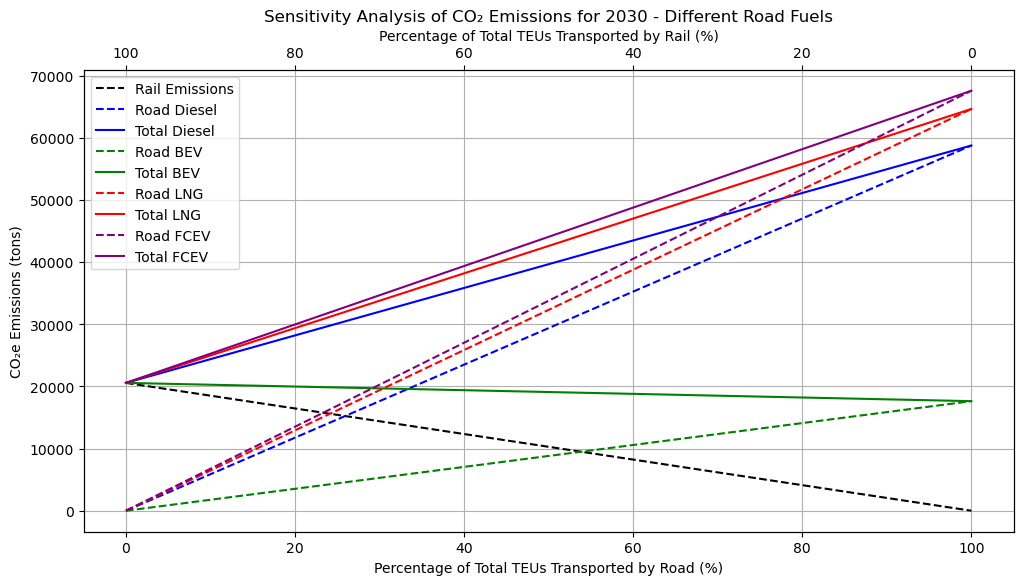

In [24]:
percentages = np.arange(0, 101, 1)

sensitivity_results = []

for road_percentage in percentages:
    rail_percentage = 100 - road_percentage
    
    # TEUs médios (apenas exemplo, sem desvio padrão)
    teus_road = (road_percentage / 100) * total_teus_mean_28_2030
    teus_rail = (rail_percentage / 100) * total_teus_mean_28_2030
    
    # Emissões ferroviárias
    rail_emissions = teus_rail * emission_factor_rail
    
    # -----------------------------
    # Emissões rodoviárias (parciais)
    # -----------------------------
    road_diesel = teus_road * emission_factor_road_diesel
    road_bev    = teus_road * emission_factor_road_bev
    road_lng    = teus_road * emission_factor_lng
    road_fcev   = teus_road * emission_factor_fcev
    
    # -----------------------------
    # Emissões totais (Rail + Road)
    # -----------------------------
    total_diesel = rail_emissions + road_diesel
    total_bev    = rail_emissions + road_bev
    total_lng    = rail_emissions + road_lng
    total_fcev   = rail_emissions + road_fcev
    
    # Armazenar resultados
    sensitivity_results.append({
        "% Road": road_percentage,
        "% Rail": rail_percentage,
        "Rail Emissions": rail_emissions,
        
        "Road Diesel": road_diesel,
        "Road BEV": road_bev,
        "Road LNG": road_lng,
        "Road FCEV": road_fcev,
        
        "Total Diesel": total_diesel,
        "Total BEV": total_bev,
        "Total LNG": total_lng,
        "Total FCEV": total_fcev
    })

df_sensitivity = pd.DataFrame(sensitivity_results)

# ----------------------------
# Plot do resultado
# ----------------------------
plt.figure(figsize=(12, 6))

# 1) Rail Emissions (preto pontilhado)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Rail Emissions"],
         label="Rail Emissions", color="black", linestyle="--")

# 2) Road Diesel (azul tracejado) e Total Diesel (azul sólido)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Road Diesel"],
         label="Road Diesel", color="blue", linestyle="--")
plt.plot(df_sensitivity["% Road"], df_sensitivity["Total Diesel"],
         label="Total Diesel", color="blue", linestyle="-")

# 3) Road BEV (verde tracejado) e Total BEV (verde sólido)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Road BEV"],
         label="Road BEV", color="green", linestyle="--")
plt.plot(df_sensitivity["% Road"], df_sensitivity["Total BEV"],
         label="Total BEV", color="green", linestyle="-")

# 4) Road LNG (vermelho tracejado) e Total LNG (vermelho sólido)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Road LNG"],
         label="Road LNG", color="red", linestyle="--")
plt.plot(df_sensitivity["% Road"], df_sensitivity["Total LNG"],
         label="Total LNG", color="red", linestyle="-")

# 5) Road FCEV (roxo tracejado) e Total FCEV (roxo sólido)
plt.plot(df_sensitivity["% Road"], df_sensitivity["Road FCEV"],
         label="Road FCEV", color="purple", linestyle="--")
plt.plot(df_sensitivity["% Road"], df_sensitivity["Total FCEV"],
         label="Total FCEV", color="purple", linestyle="-")

plt.xlabel("Percentage of Total TEUs Transported by Road (%)")
plt.ylabel("CO₂e Emissions (tons)")
plt.title("Sensitivity Analysis of CO₂ Emissions for 2030 - Different Road Fuels")
plt.grid(True)
plt.legend()

# Eixo superior (porcentagem Rail)
ax1 = plt.gca()
ax2 = ax1.twiny()

ax2.set_xlim(ax1.get_xlim())  # Alinha os limites do eixo superior ao eixo inferior
ax2.set_xticks(df_sensitivity["% Road"][::20])  # Seleciona menos pontos para evitar sobreposição
ax2.set_xticklabels(100 - df_sensitivity["% Road"][::20])  # Usa os valores complementares para o eixo superior
ax2.set_xlabel("Percentage of Total TEUs Transported by Rail (%)")

plt.show()

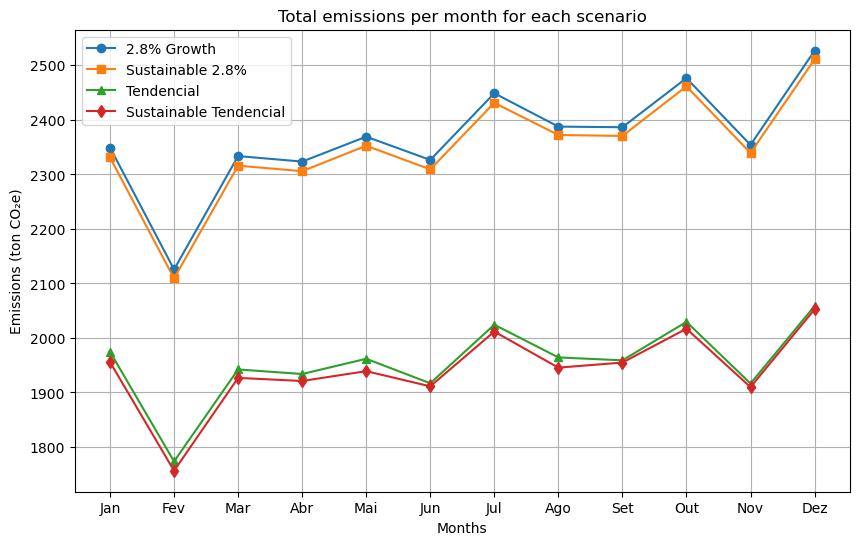

In [9]:
# Nomes dos meses (para o eixo X)
meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

# Fatores de emissão
emission_factor_rail = 0.28
emission_factor_road = 0.6  # Exemplo: diesel

def calc_monthly_emissions(rail_inbound, rail_outbound, road_inbound, road_outbound,
                           ef_rail, ef_road):
    """Retorna lista de emissões mensais (12 valores) para um cenário."""
    monthly_emissions = []
    for i in range(12):
        # TEUs mensais (inbound + outbound) para rail e road
        rail_teus = rail_inbound[i] + rail_outbound[i]
        road_teus = road_inbound[i] + road_outbound[i]
        
        # Emissões mensais
        emissions_rail = rail_teus * ef_rail
        emissions_road = road_teus * ef_road
        total = emissions_rail + emissions_road
        
        monthly_emissions.append(total)
    return monthly_emissions

emissions_28 = calc_monthly_emissions(
    rail_inbound_28, rail_outbound_28,
    road_inbound_28, road_outbound_28,
    emission_factor_rail, emission_factor_road
)

emissions_sust_28 = calc_monthly_emissions(
    rail_inbound_sustainable_28, rail_outbound_sustainable_28,
    road_inbound_sustainable_28, road_outbound_sustainable_28,
    emission_factor_rail, emission_factor_road
)

emissions_tend = calc_monthly_emissions(
    rail_inbound_tendencial, rail_outbound_tendencial,
    road_inbound_tendencial, road_outbound_tendencial,
    emission_factor_rail, emission_factor_road
)

emissions_sust_tend = calc_monthly_emissions(
    rail_inbound_sustainable_tendencial, rail_outbound_sustainable_tendencial,
    road_inbound_sustainable_tendencial, road_outbound_sustainable_tendencial,
    emission_factor_rail, emission_factor_road
)

# -------------------------------------------
# Plotar em um único gráfico
# -------------------------------------------
plt.figure(figsize=(10, 6))

plt.plot(meses, emissions_28, marker='o', label='2.8% Growth')
plt.plot(meses, emissions_sust_28, marker='s', label='Sustainable 2.8%')
plt.plot(meses, emissions_tend, marker='^', label='Tendencial')
plt.plot(meses, emissions_sust_tend, marker='d', label='Sustainable Tendencial')

plt.title("Total emissions per month for each scenario")
plt.xlabel("Months")
plt.ylabel("Emissions (ton CO₂e)")
plt.legend()
plt.grid(True)
plt.show()


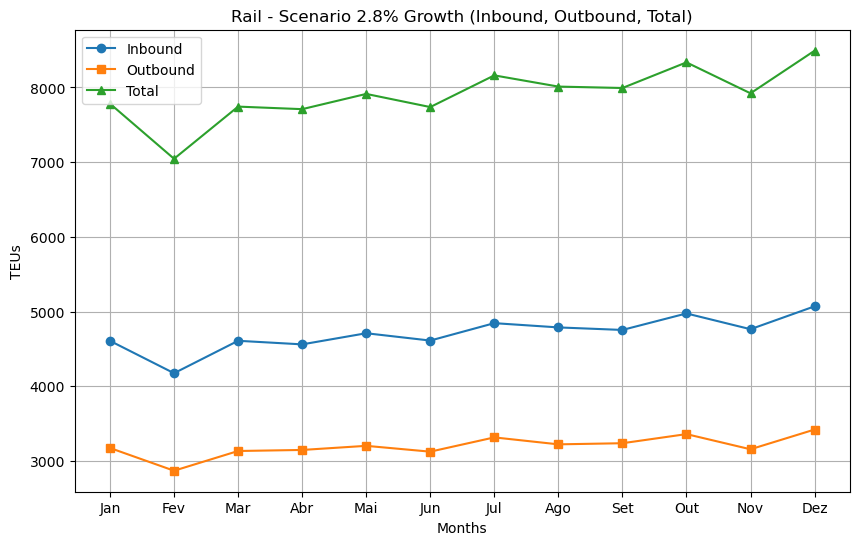

In [10]:
# Meses (para o eixo X)
meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

# Calcular a soma (Inbound + Outbound) para cada mês
rail_total_28 = [
    rail_inbound_28[i] + rail_outbound_28[i]
    for i in range(12)
]

# Plot
plt.figure(figsize=(10, 6))

plt.plot(meses, rail_inbound_28, marker='o', label='Inbound')
plt.plot(meses, rail_outbound_28, marker='s', label='Outbound')
plt.plot(meses, rail_total_28, marker='^', label='Total')

plt.title("Rail - Scenario 2.8% Growth (Inbound, Outbound, Total)")
plt.xlabel("Months")
plt.ylabel("TEUs")
plt.grid(True)
plt.legend()
plt.show()


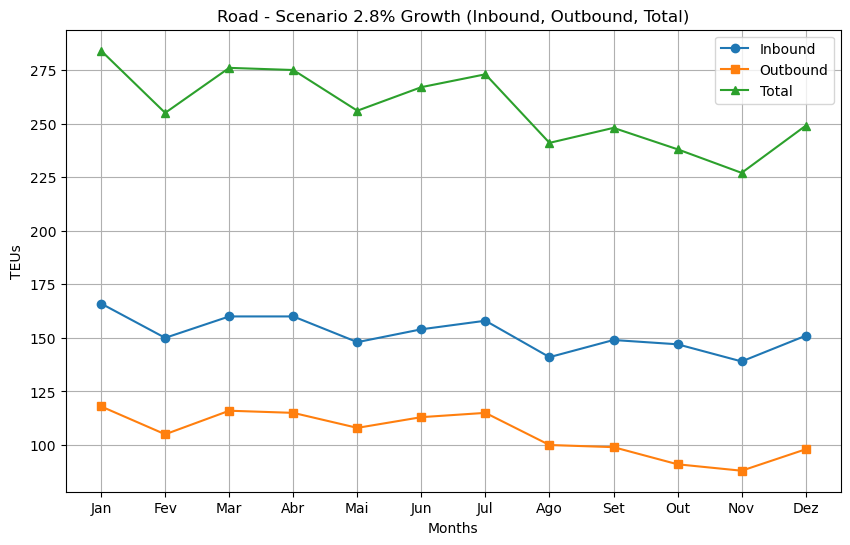

In [11]:
# Meses (para o eixo X)
meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

# Calcular a soma (Inbound + Outbound) para cada mês
road_total_28 = [
    road_inbound_28[i] + road_outbound_28[i]
    for i in range(12)
]

# Plot
plt.figure(figsize=(10, 6))

plt.plot(meses, road_inbound_28, marker='o', label='Inbound')
plt.plot(meses, road_outbound_28, marker='s', label='Outbound')
plt.plot(meses, road_total_28, marker='^', label='Total')

plt.title("Road - Scenario 2.8% Growth (Inbound, Outbound, Total)")
plt.xlabel("Months")
plt.ylabel("TEUs")
plt.grid(True)
plt.legend()
plt.show()